In [1004]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

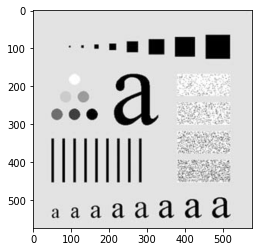

In [1005]:
A = cv2.imread("A.png",0)
rows, cols = A.shape
plt.imshow(A,cmap='gray')

In [1006]:
def distance(u,v,rows,cols):
    return math.sqrt((u - rows / 2)**2 + (v - cols / 2)**2)

In [1007]:


def ideal_low_filter(D0):
    ideal_low = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            if distance(x,y,rows,cols) <= D0:
                ideal_low[x][y] = 1
    return ideal_low

def ideal_hight_filter(D0):
    ideal_hight = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            if distance(x,y,rows,cols) > D0:
                ideal_hight[x][y] = 1
    return ideal_hight

In [1008]:
def batervort_low_filter(D0,n):
    batervort_low = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            batervort_low[x][y] = 1 / (1 + (distance(x, y, rows, cols)/D0)**(2*n))
    return batervort_low

def batervort_hight_filter(D0,n):
    batervort_hight = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            batervort_hight[x][y] = 1 - 1 / (1 + (distance(x, y, rows, cols)/D0)**(2*n))
    return batervort_hight

In [1009]:
def gause_low_filter(D0):
    gause_low = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            d = D0**2 * 2
            gause_low[x][y] = math.exp((-1*distance(x,y,rows,cols)**2)/d)
    return gause_low

def gause_hight_filter(D0):
    gause_hight = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            d = D0**2 * 2
            gause_hight[x][y] =1 - math.exp((-1*distance(x,y,rows,cols)**2)/d)
    return gause_hight

In [1010]:
def spectrum(img):
    fft = np.fft.fft2(img) # фурье
    fft_shift = np.fft.fftshift(fft) # сдвиг массива в центр
    #fg = np.log(np.abs(fft_shift))
    return fft_shift
#Пространственный фильтр
def change_spectrum(img, mask):
    fshift = img*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift) #обратный фурье
    return fshift, img_back

def print_spectrum(img):
    magnitude_spectrum = np.abs(img)**0.1
    plt.imshow(magnitude_spectrum, cmap= 'gray')

def print_img(img):
    filtered_img = np.abs(img)
    filtered_img -= filtered_img.min()
    filtered_img = filtered_img * 255 / filtered_img.max()
    filtered_img = filtered_img.astype(np.uint8)
    plt.imshow(filtered_img, cmap= 'gray')
    return filtered_img

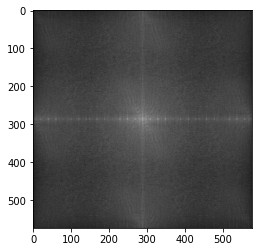

In [1011]:
sp = spectrum(A)
print_spectrum(sp)

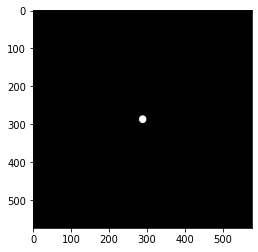

In [1012]:
D = 10 #20
ILFF = ideal_low_filter(D)
print_spectrum(ILFF)

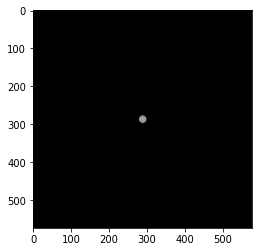

In [1013]:
spc,img_back = change_spectrum(sp, ILFF)
print_spectrum(spc)

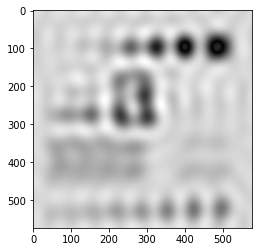

In [1014]:
plt.imshow(print_img(img_back),cmap= 'gray')

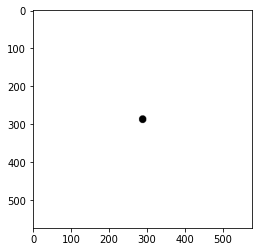

In [1015]:
IHFF = ideal_hight_filter(D)
print_spectrum(IHFF)

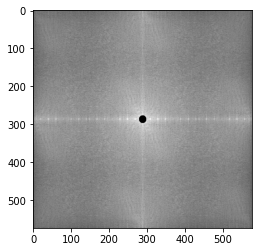

In [1016]:
spc,img_back = change_spectrum(sp, IHFF)
print_spectrum(spc)

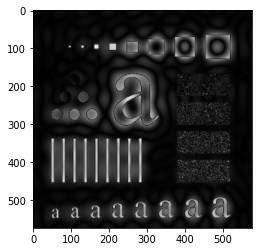

In [1017]:
plt.imshow(print_img(img_back),cmap= 'gray')

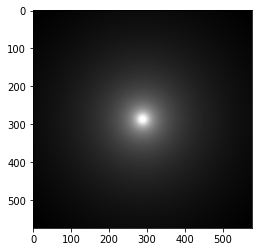

In [1018]:
D = 10
n= 2

BLFF = batervort_low_filter(D,n)
print_spectrum(BLFF)

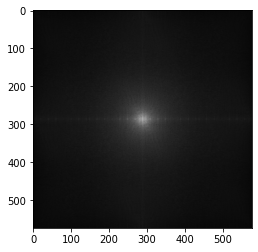

In [1019]:
spc,img_back = change_spectrum(sp, BLFF)
print_spectrum(spc)

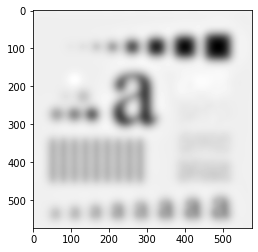

In [1020]:
plt.imshow(print_img(img_back),cmap= 'gray')

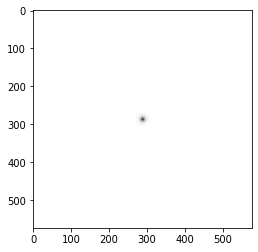

In [1021]:
BHFF = batervort_hight_filter(D,n)
print_spectrum(BHFF)

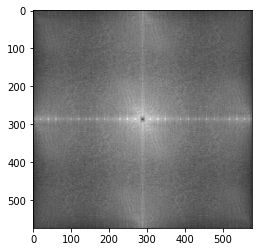

In [1022]:
spc,img_back = change_spectrum(sp, BHFF)
print_spectrum(spc)

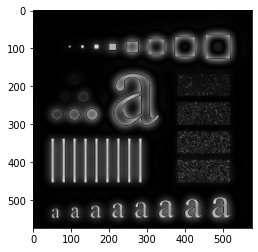

In [1023]:
plt.imshow(print_img(img_back),cmap= 'gray')

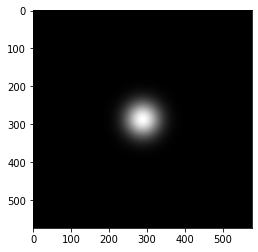

In [1024]:
D = 10

GLFF = gause_low_filter(D)
print_spectrum(GLFF)

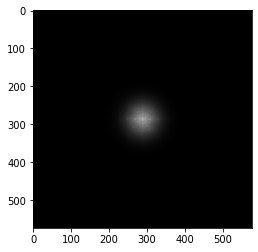

In [1025]:
spc,img_back = change_spectrum(sp, GLFF)
print_spectrum(spc)

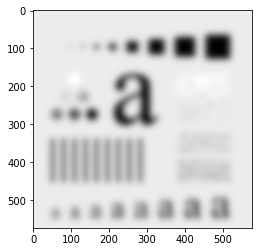

In [1026]:
plt.imshow(print_img(img_back),cmap= 'gray')

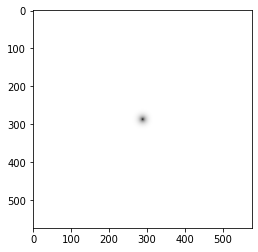

In [1027]:
GHFF = gause_hight_filter(D)
print_spectrum(GHFF)

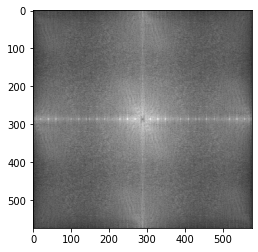

In [1028]:
spc,img_back = change_spectrum(sp, GHFF)
print_spectrum(spc)

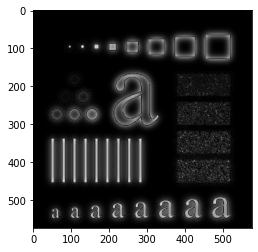

In [1029]:
plt.imshow(print_img(img_back),cmap= 'gray')